In [1]:
### If save data:
save_data = False

if save_data:
  def ensure_dir(file_path):
    import os
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

  from google.colab import drive
  drive.mount('/content/drive')
  %cd drive/My Drive/
  save_dir = "Figs/"
  ensure_dir(save_dir)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

!pip install -q git+https://github.com/Pehlevan-Group/kernel-generalization
from kernel_generalization.utils import gegenbauer
from kernel_generalization import kernel_spectrum as ker_spec
from kernel_generalization import kernel_simulation as ker_sim

!git clone https://github.com/Pehlevan-Group/kernel-generalization.git
gegenbauer_dir = os.path.join(os.getcwd(),'kernel-generalization/PrecomputedData/GegenbauerEigenvalues.npz')

Cloning into 'kernel-generalization'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 558 (delta 62), reused 0 (delta 0), pack-reused 433
Receiving objects: 100% (558/558), 21.84 MiB | 26.98 MiB/s, done.
Resolving deltas: 100% (315/315), done.


Text(0, 0.5, '$\\lambda_l$')

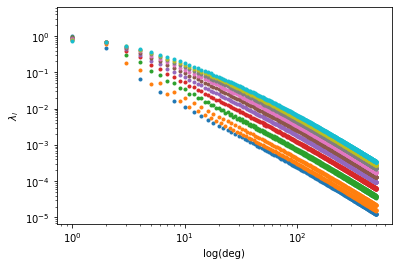

In [3]:
dim = np.array([5*(i+1) for i in range(40)])
deg = np.array([i for i in range(501)]); 
layer = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9,10]);

data = np.load(gegenbauer_dir, allow_pickle=True)
eig, eig_real, eig_raw = [data['arr_'+str(i)] for i in range(len(data.files))]

dim_idx = 8
for i in range(layer.size):
    plt.loglog((deg),eig[dim_idx,:,i],'.',label = 'layer = '+str(layer[i]));
    
plt.xlabel('log(deg)')
plt.ylabel('$\lambda_l$')

# Generate Degree Dependence across Different Layers

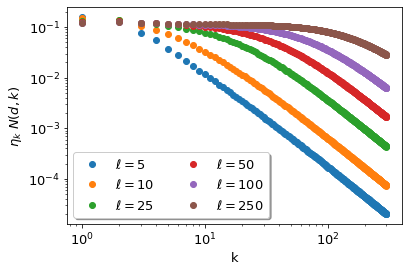

In [4]:
d = 10
kmax = 300
layers = [5, 10, 25, 50, 100, 250]
sig_w = 1
sig_b = 0
num_pts = 5000
degens = np.array([gegenbauer.degeneracy_kernel(d, k) for k in range(kmax)])
_,spectra_layer, spectrum_scaled, degens,_ = ker_spec.get_kernel_spectrum(layers, sig_w, sig_b, kmax, d);

plt.rcParams.update({'font.size': 13})

k = np.linspace(1, kmax, kmax-1)
for i in range(len(layers)):
    plt.loglog((k), (spectra_layer[i, 1:] * degens[1:]), 'o', label=r'$\ell = %d$' % layers[i])
    
plt.xlabel('k')
plt.ylabel('$\eta_k\,\, N(d,k)$')
plt.legend(loc='best', shadow=True, ncol=2)

# Generate Dimension Dependence using Precomputed Spectrum

(40, 501)


Text(0, 0.5, '$\\overline{\\eta}_l$')

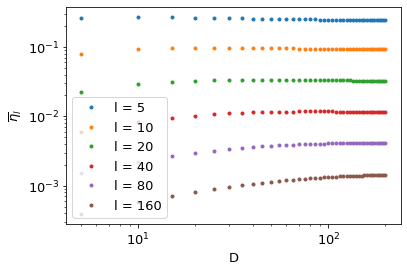

In [5]:
layer = 5
spectra_dim = eig[:,:,layer]
print(spectra_dim.shape)

kvalues = [5,10,20,40,80,160]

for i, l in enumerate(kvalues):
    plt.loglog((dim),spectra_dim[:,l],'.',label = 'l = '+str(l));

plt.legend()
plt.xlabel('D')
plt.ylabel('$\overline{\eta}_l$')

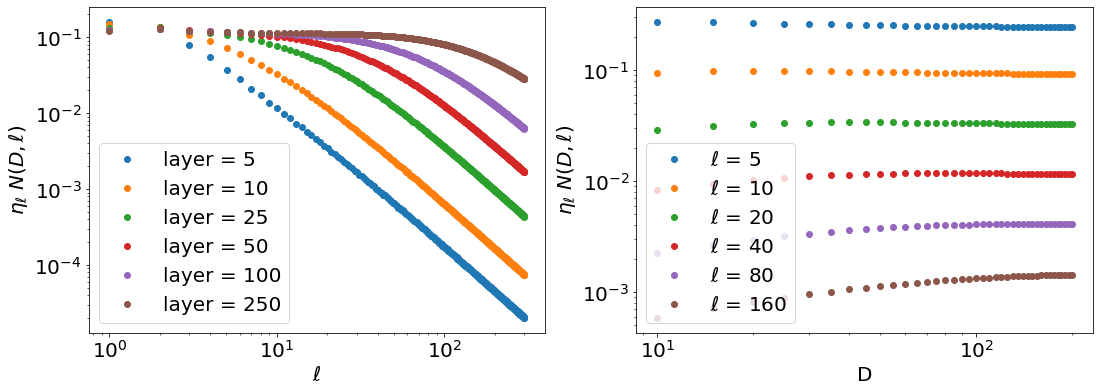

In [6]:
plt.rcParams.update({'font.size': 20})

fig, [ax1, ax2] = plt.subplots(1,2)
fig.set_size_inches(18,6)

k = np.linspace(1, kmax, kmax-1)
for i in range(len(layers)):
    ax1.loglog((k), (spectra_layer[i, 1:] * degens[1:]), 'o', label=r'layer = %d' % layers[i])
    
ax1.set_xlabel('$\\ell$')
ax1.set_ylabel('$\eta_\ell\,\, N(D,\ell)$')
ax1.legend(loc='best', ncol=1)

cut = 1
for i, l in enumerate(kvalues):
    ax2.loglog((dim[cut:]),spectra_dim[cut:,l],'o',label = '$\\ell$ = '+str(l));

ax2.legend()
ax2.set_xlabel('D')
ax2.set_ylabel('$\eta_\ell\,\, N(D,\ell)$')


if save_data: plt.savefig(save_dir + 'ntk_spectrum_dependence.pdf', bbox_inches='tight');